<a href="https://colab.research.google.com/github/gharashim/DL/blob/main/02_Machine_Learning_Basic_EX_08_SOL_Blood_Pressure_Multi_Variable_Logistic_R_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

>### [예제 8: SOL] Blood Pressure Logistic Regression (TF)

>### Load modules

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

if tf.__version__ >= '2.17.0':
    from tf_keras import optimizers
else:
    from tensorflow.keras import optimizers

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.26.4
TensorFlow Version :2.17.0
Matplotlib Version :3.7.1


> ### Input and Label

In [ ]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[0],[0],[1],[0],[1],[0],[0],[0],[1],[0],[0],[1],[1],[1],[1],[0],[1],[1]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [ ]:
# Min Max Scaler
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [ ]:
# Hypothesis
def Hypothesis(x):
  return tf.sigmoid(tf.add(tf.matmul(x ,W), B))

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [ ]:
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input)))

### 학습 (Training)

In [ ]:
%%time
# Parameter Set
epochs = 10000
learning_rate = 0.1
optimizer = optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.08, epochs*0.2, epochs*0.4, epochs])

W_trained = []
b_trained = []
check_idx = 0

# 학습 (Training)
for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs//20) == 0:
    print("[{:>5}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}]], B = [[{:>7.4}]]".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B[0]))
  if check[check_idx] == cnt:
    W_trained.append(W.numpy())
    b_trained.append(B.numpy())
    check_idx += 1

  optimizer.minimize(Cost,[W, B])

[    0] cost =     0.8205, W = [[-0.6401] [-0.3079]], B = [[-0.1266]]
[  500] cost =     0.4936, W = [[  1.155] [  2.102]], B = [[ -1.531]]
[ 1000] cost =     0.4531, W = [[  1.989] [  2.843]], B = [[ -2.376]]
[ 1500] cost =     0.4399, W = [[  2.493] [  3.245]], B = [[ -2.859]]
[ 2000] cost =     0.4344, W = [[   2.82] [  3.503]], B = [[  -3.17]]
[ 2500] cost =     0.4318, W = [[  3.043] [  3.682]], B = [[ -3.383]]
[ 3000] cost =     0.4305, W = [[  3.201] [   3.81]], B = [[ -3.535]]
[ 3500] cost =     0.4298, W = [[  3.316] [  3.904]], B = [[ -3.645]]
[ 4000] cost =     0.4295, W = [[    3.4] [  3.973]], B = [[ -3.726]]
[ 4500] cost =     0.4293, W = [[  3.463] [  4.025]], B = [[ -3.787]]
[ 5000] cost =     0.4291, W = [[   3.51] [  4.065]], B = [[ -3.832]]
[ 5500] cost =     0.4291, W = [[  3.546] [  4.094]], B = [[ -3.867]]
[ 6000] cost =      0.429, W = [[  3.573] [  4.117]], B = [[ -3.893]]
[ 6500] cost =      0.429, W = [[  3.594] [  4.135]], B = [[ -3.914]]
[ 7000] cost =      

>### Hypothesis Test

In [ ]:
print("[ Hypothesis test ]")
H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => Result : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => Result : 0.01853 [label => [0.]]
Age : 25.0, BMI :    26.0 => Result :  0.1326 [label => [0.]]
Age : 25.0, BMI :    30.0 => Result :  0.5531 [label => [1.]]
Age : 35.0, BMI :    22.0 => Result : 0.03884 [label => [0.]]
Age : 35.0, BMI :    26.0 => Result :  0.2465 [label => [1.]]
Age : 35.0, BMI :    30.0 => Result :  0.7259 [label => [0.]]
Age : 45.0, BMI :    22.0 => Result : 0.07959 [label => [0.]]
Age : 45.0, BMI :    26.0 => Result :  0.4118 [label => [0.]]
Age : 45.0, BMI :    30.0 => Result :    0.85 [label => [1.]]
Age : 55.0, BMI :    22.0 => Result :  0.1562 [label => [0.]]
Age : 55.0, BMI :    26.0 => Result :  0.5997 [label => [0.]]
Age : 55.0, BMI :    30.0 => Result :  0.9238 [label => [1.]]
Age : 65.0, BMI :    22.0 => Result :  0.2837 [label => [1.]]
Age : 65.0, BMI :    26.0 => Result :  0.7622 [label => [1.]]
Age : 65.0, BMI :    30.0 => Result :  0.9629 [label => [1.]]
Age : 73.0, BMI :    22.0 => Result :  0.4212 [lab

In [ ]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))

In [ ]:
# predict
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("Age : {}, BMI : {} => Result : {:>7.4}".format(x_test[0,0],x_test[0,1],H_x[0,0]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 => Result :  0.3778


>### Plotting

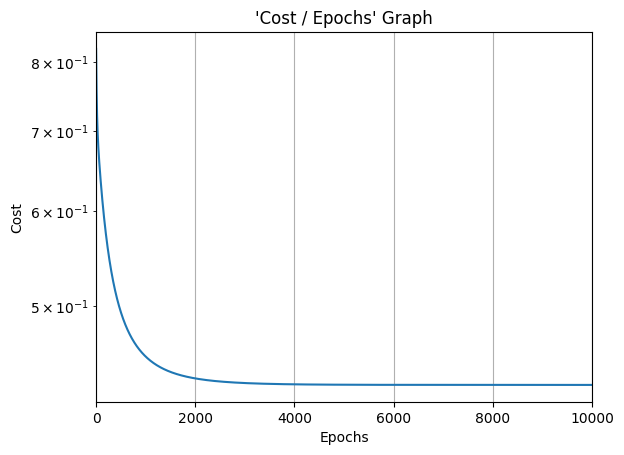

In [ ]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show()

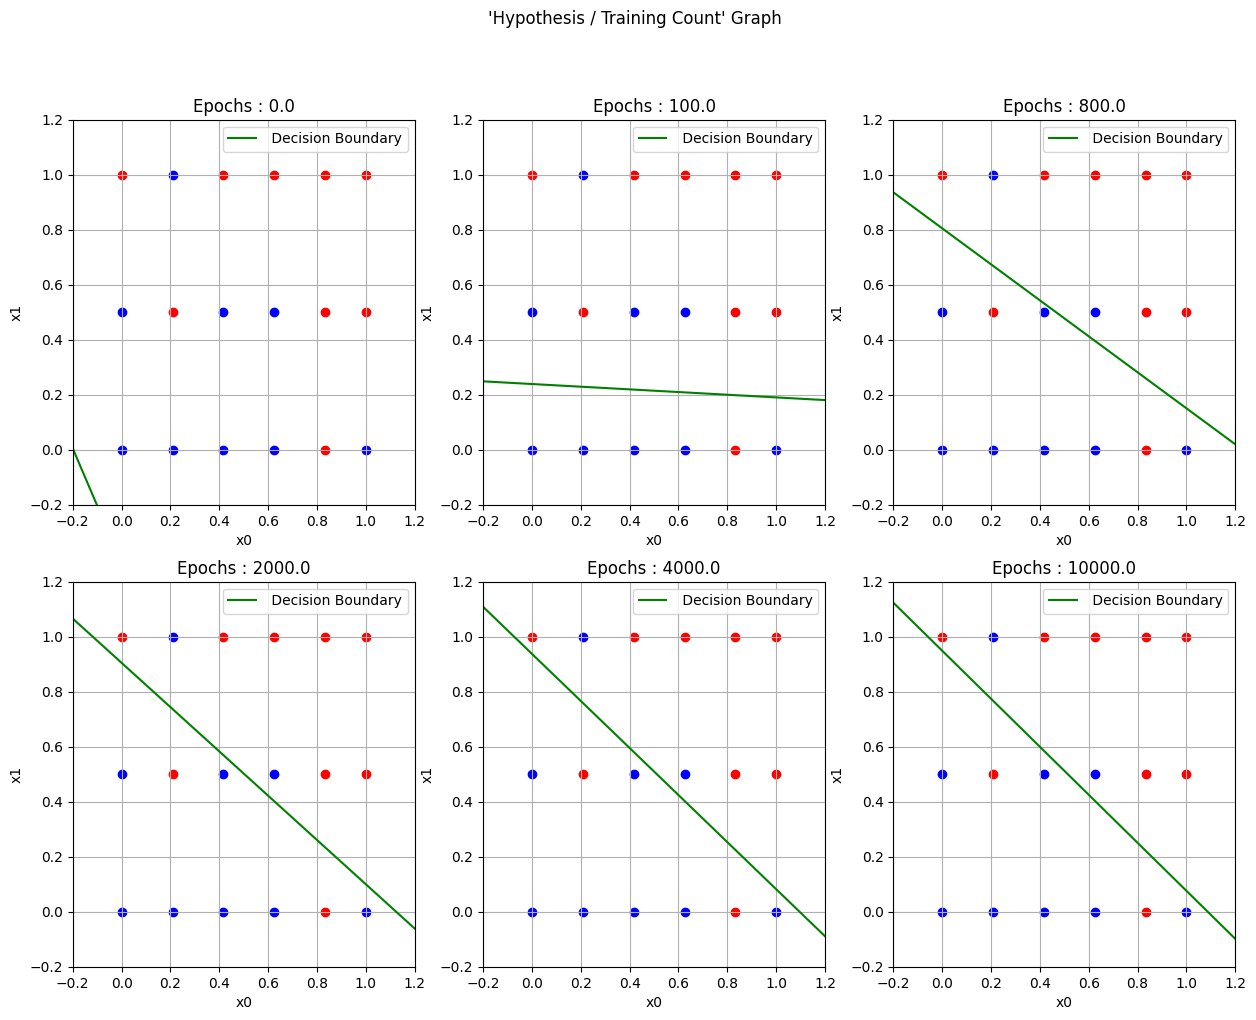

In [ ]:
# 구분선 그리기
x_decision = np.linspace(-0.2, 1.2, 1000)

fig, axes = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Training Count' Graph")

for ax_idx in range(check.size):
    W = W_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0] * x_decision + B[0])/W[1]

    ax = axes[ax_idx // 3][ax_idx % 3]

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax.scatter(x_input[i][0], x_input[i][1], color='blue')
        else:
            ax.scatter(x_input[i][0], x_input[i][1], color='red')

    ax.plot(x_decision, y_decision, label=' Decision Boundary', color='green')

    ax.set_title("Epochs : {}".format(check[ax_idx]))
    ax.set_xlim((-0.2, 1.2))
    ax.set_ylim((-0.2, 1.2))
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.grid(True)
    ax.legend()

plt.show()